In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

### Time series recursiva

In [120]:
#Lendo dados
df = pd.read_csv('Datasets/Acoes/AAPL_5.csv')
df.drop(columns=['Unnamed: 0', 'Abertura'], inplace=True)
df.rename(columns={'Alvo': 'Alvo 0'}, inplace=True)

def window (df, w):
    for i in range(1,(w+1)):
        df['Alvo '+str(i)] = df['Alvo '+str(i-1)].shift(1)
    return df

nomes = {'Alvo 0': 'Alvo',
        'Alvo 1': 'Dia_1',
        'Alvo 2': 'Dia_2',
        'Alvo 3': 'Dia_3',
        'Alvo 4': 'Dia_4',
        'Alvo 5': 'Dia_5',}
        
df = window(df,5)
df = df.rename(columns=nomes)
df.dropna(inplace=True)
df.head()

,Alvo,Dia_1,Dia_2,Dia_3,Dia_4,Dia_5
5,25.257500,25.467501,25.752501,25.375000,25.187500,25.132500
6,25.280001,25.257500,25.467501,25.752501,25.375000,25.187500
7,25.292500,25.280001,25.257500,25.467501,25.752501,25.375000
8,25.565001,25.292500,25.280001,25.257500,25.467501,25.752501
9,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501


In [121]:
limite = int(len(df) * 0.8)

X = df.drop(columns='Alvo')
y = df['Alvo'].to_list()

X_train, y_train = X[:limite], y[:limite]
X_test, y_test = X[limite:], y[limite:]

In [122]:
# Definindo espaços hiperparamétricos
kernel = ['rbf','linear']
C = (np.arange(10,100)/100).tolist() #0.1 - 0.99
epsilon = (np.arange(1,1000)/1000).tolist() #0.001 - 0.999

space = {'kernel': kernel, 'C':C, 'epsilon':epsilon}

In [123]:
#Aplicando Random Search

space = {'kernel': kernel, 'C':C, 'epsilon':epsilon}

modelo = RandomizedSearchCV(SVR(), space, n_iter= 60, verbose=3)

modelo.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] kernel=rbf, epsilon=0.738, C=0.47 ...............................
[CV] . kernel=rbf, epsilon=0.738, C=0.47, score=-41.361, total=   0.1s
[CV] kernel=rbf, epsilon=0.738, C=0.47 ...............................
[CV] ... kernel=rbf, epsilon=0.738, C=0.47, score=0.960, total=   0.0s
[CV] kernel=rbf, epsilon=0.738, C=0.47 ...............................
[CV] ... kernel=rbf, epsilon=0.738, C=0.47, score=0.882, total=   0.0s
[CV] kernel=rbf, epsilon=0.738, C=0.47 ...............................
[CV] ... kernel=rbf, epsilon=0.738, C=0.47, score=0.953, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] kernel=rbf, epsilon=0.738, C=0.47 ...............................
[CV] .. kernel=rbf, epsilon=0.738, C=0.47, score=-2.335, total=   0.0s
[CV] kernel=rbf, epsilon=0.224, C=0.65 ...............................
[CV] . kernel=rbf, epsilon=0.224, C=0.65, score=-27.695, total=   0.1s
[CV] kernel=rbf, epsilon=0.224, C=0.65 ...............................
[CV] ... kernel=rbf, epsilon=0.224, C=0.65, score=0.963, total=   0.1s
[CV] kernel=rbf, epsilon=0.224, C=0.65 ...............................
[CV] ... kernel=rbf, epsilon=0.224, C=0.65, score=0.900, total=   0.1s
[CV] kernel=rbf, epsilon=0.224, C=0.65 ...............................
[CV] ... kernel=rbf, epsilon=0.224, C=0.65, score=0.958, total=   0.1s
[CV] kernel=rbf, epsilon=0.224, C=0.65 ...............................
[CV] .. kernel=rbf, epsilon=0.224, C=0.65, score=-2.314, total=   0.0s
[CV] kernel=linear, epsilon=0.989, C=0.78 ............................
[CV]  kernel=linear, epsilon=0.989, C=0.78, score=0.964, total=   0.2s
[CV] 

[CV] .... kernel=rbf, epsilon=0.73, C=0.29, score=0.951, total=   0.0s
[CV] kernel=rbf, epsilon=0.73, C=0.29 ................................
[CV] ... kernel=rbf, epsilon=0.73, C=0.29, score=-2.408, total=   0.0s
[CV] kernel=rbf, epsilon=0.366, C=0.64 ...............................
[CV] . kernel=rbf, epsilon=0.366, C=0.64, score=-29.820, total=   0.0s
[CV] kernel=rbf, epsilon=0.366, C=0.64 ...............................
[CV] ... kernel=rbf, epsilon=0.366, C=0.64, score=0.961, total=   0.1s
[CV] kernel=rbf, epsilon=0.366, C=0.64 ...............................
[CV] ... kernel=rbf, epsilon=0.366, C=0.64, score=0.898, total=   0.0s
[CV] kernel=rbf, epsilon=0.366, C=0.64 ...............................
[CV] ... kernel=rbf, epsilon=0.366, C=0.64, score=0.956, total=   0.1s
[CV] kernel=rbf, epsilon=0.366, C=0.64 ...............................
[CV] .. kernel=rbf, epsilon=0.366, C=0.64, score=-2.317, total=   0.1s
[CV] kernel=rbf, epsilon=0.542, C=0.99 ...............................
[CV] .

[CV]  kernel=linear, epsilon=0.366, C=0.19, score=0.965, total=   0.4s
[CV] kernel=linear, epsilon=0.366, C=0.19 ............................
[CV]  kernel=linear, epsilon=0.366, C=0.19, score=0.985, total=   0.6s
[CV] kernel=linear, epsilon=0.366, C=0.19 ............................
[CV]  kernel=linear, epsilon=0.366, C=0.19, score=0.945, total=   0.4s
[CV] kernel=linear, epsilon=0.366, C=0.19 ............................
[CV]  kernel=linear, epsilon=0.366, C=0.19, score=0.972, total=   0.4s
[CV] kernel=linear, epsilon=0.366, C=0.19 ............................
[CV]  kernel=linear, epsilon=0.366, C=0.19, score=0.992, total=   0.2s
[CV] kernel=linear, epsilon=0.959, C=0.25 ............................
[CV]  kernel=linear, epsilon=0.959, C=0.25, score=0.964, total=   0.1s
[CV] kernel=linear, epsilon=0.959, C=0.25 ............................
[CV]  kernel=linear, epsilon=0.959, C=0.25, score=0.985, total=   0.2s
[CV] kernel=linear, epsilon=0.959, C=0.25 ............................
[CV]  

[CV]  kernel=linear, epsilon=0.054, C=0.46, score=0.973, total=   1.4s
[CV] kernel=linear, epsilon=0.054, C=0.46 ............................
[CV]  kernel=linear, epsilon=0.054, C=0.46, score=0.992, total=   0.9s
[CV] kernel=linear, epsilon=0.38, C=0.1 ..............................
[CV] .. kernel=linear, epsilon=0.38, C=0.1, score=0.964, total=   0.3s
[CV] kernel=linear, epsilon=0.38, C=0.1 ..............................
[CV] .. kernel=linear, epsilon=0.38, C=0.1, score=0.985, total=   0.3s
[CV] kernel=linear, epsilon=0.38, C=0.1 ..............................
[CV] .. kernel=linear, epsilon=0.38, C=0.1, score=0.944, total=   0.3s
[CV] kernel=linear, epsilon=0.38, C=0.1 ..............................
[CV] .. kernel=linear, epsilon=0.38, C=0.1, score=0.972, total=   0.3s
[CV] kernel=linear, epsilon=0.38, C=0.1 ..............................
[CV] .. kernel=linear, epsilon=0.38, C=0.1, score=0.992, total=   0.1s
[CV] kernel=rbf, epsilon=0.041, C=0.7 ................................
[CV] .

[CV] ... kernel=rbf, epsilon=0.711, C=0.3, score=-2.413, total=   0.0s
[CV] kernel=rbf, epsilon=0.171, C=0.58 ...............................
[CV] . kernel=rbf, epsilon=0.171, C=0.58, score=-30.679, total=   0.1s
[CV] kernel=rbf, epsilon=0.171, C=0.58 ...............................
[CV] ... kernel=rbf, epsilon=0.171, C=0.58, score=0.964, total=   0.0s
[CV] kernel=rbf, epsilon=0.171, C=0.58 ...............................
[CV] ... kernel=rbf, epsilon=0.171, C=0.58, score=0.899, total=   0.0s
[CV] kernel=rbf, epsilon=0.171, C=0.58 ...............................
[CV] ... kernel=rbf, epsilon=0.171, C=0.58, score=0.958, total=   0.1s
[CV] kernel=rbf, epsilon=0.171, C=0.58 ...............................
[CV] .. kernel=rbf, epsilon=0.171, C=0.58, score=-2.319, total=   0.0s
[CV] kernel=rbf, epsilon=0.185, C=0.24 ...............................
[CV] . kernel=rbf, epsilon=0.185, C=0.24, score=-54.339, total=   0.1s
[CV] kernel=rbf, epsilon=0.185, C=0.24 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(estimator=SVR(), n_iter=60,
                   param_distributions={'C': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                                              0.16, 0.17, 0.18, 0.19, 0.2, 0.21,
                                              0.22, 0.23, 0.24, 0.25, 0.26,
                                              0.27, 0.28, 0.29, 0.3, 0.31, 0.32,
                                              0.33, 0.34, 0.35, 0.36, 0.37,
                                              0.38, 0.39, ...],
                                        'epsilon': [0.001, 0.002, 0.003, 0.004,
                                                    0.005, 0.006, 0.007, 0.008,
                                                    0.009, 0.01, 0.011, 0.012,
                                                    0.013, 0.014, 0.015, 0.016,
                                                    0.017, 0.018, 0.019, 0.02,
                                                    0.021, 0.022, 0.023, 0.024,
                

In [124]:
modelo.best_params_

{'kernel': 'linear', 'epsilon': 0.02, 'C': 0.74}

Text(0.5, 1.0, '0.9866857035594551')

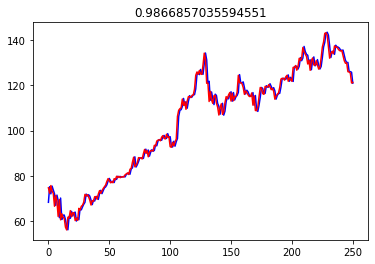

In [125]:
score = modelo.score(X_test, y_test)

predicoes = modelo.predict(X_test)

plt.plot(predicoes, color='blue')
plt.plot(y_test, color='red')
plt.title(score)

Text(0.5, 1.0, '0.9866857035594551')

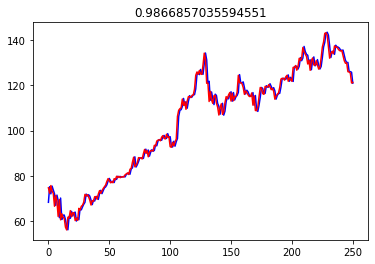

In [129]:
mod2 = SVR(kernel= 'linear', epsilon= 0.02, C= 0.74)
mod2.fit(X_train, y_train)
score2 = mod2.score(X_test, y_test)
pr2 = mod2.predict(X_test)

plt.plot(pr2, color='blue')
plt.plot(y_test, color='red')
plt.title(score2)

In [80]:
d5 = np.array(X_train.iloc[-5].to_list()).reshape(-1, 5)
d4 = np.array(X_train.iloc[-4].to_list()).reshape(-1, 5)
d3 = np.array(X_train.iloc[-3].to_list()).reshape(-1, 5)
d2 = np.array(X_train.iloc[-2].to_list()).reshape(-1, 5)
d1 = np.array(X_train.iloc[-1].to_list()).reshape(-1, 5)


lista = [modelo.predict(d1)[0],modelo.predict(d2)[0],modelo.predict(d3)[0],modelo.predict(d4)[0],modelo.predict(d5)[0]]
lista = np.array(lista).reshape(-1,5)

pred1 = modelo.predict(lista)
print(pred1)

[123.24987014]


In [81]:
print(modelo.predict(np.array(X_test.iloc[0].to_list()).reshape(-1, 5)))

[122.22612821]


In [91]:
results = np.array(X_train.tail(5))
#results = np.append(a,[[1,2,3,4,5]])

print(results[-1])

[122.41000366 123.23999786 121.77999878 124.37999725 123.75      ]


In [156]:
data = np.array(X_train.tail(5))
print(data)
results = list()
results.append(y_train[-5:])

for i in range(len(y_test)+1):
    print(i)
    d5 = np.array(data[-5]).reshape(-1, 5)
    d4 = np.array(data[-4]).reshape(-1, 5)
    d3 = np.array(data[-3]).reshape(-1, 5)
    d2 = np.array(data[-2]).reshape(-1, 5)
    d1 = np.array(data[-1]).reshape(-1, 5)
    
    d0 = [modelo.predict(d1)[0],modelo.predict(d2)[0],modelo.predict(d3)[0],modelo.predict(d4)[0],modelo.predict(d5)[0]]
    d0 = np.array(d0).reshape(-1,5)
    
    results.append(modelo.predict(d0)[0])
    
    data = np.append(data, d0)
    data = np.array(data).reshape(-1,5)

[[78.26249695 80.07499695 80.90499878 79.75       81.23750305]
 [74.54499817 78.26249695 80.07499695 80.90499878 79.75      ]
 [72.01999664 74.54499817 78.26249695 80.07499695 80.90499878]
 [73.16249847 72.01999664 74.54499817 78.26249695 80.07499695]
 [68.37999725 73.16249847 72.01999664 74.54499817 78.26249695]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
19

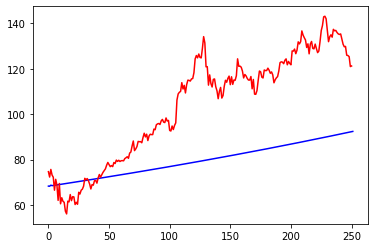

In [160]:
plt.plot(results[:][1:], color='blue')
plt.plot(y_test, color='red')

In [159]:
results[:][1:]

[68.33741264972413,
 68.28777718290475,
 68.74854768098739,
 68.55018225382118,
 68.6254394440024,
 68.6807725571365,
 68.8005213626824,
 68.86734271396234,
 68.94942092308737,
 69.02755358180038,
 69.11237681769343,
 69.19351493596368,
 69.27572554638427,
 69.35748717583046,
 69.43994214232625,
 69.52224945984052,
 69.60474473121975,
 69.6872892257601,
 69.76999217892298,
 69.85278901035635,
 69.93570493562801,
 70.01872688953735,
 70.10186460552576,
 70.18511335050461,
 70.26847529816258,
 70.35194936798179,
 70.43553650731009,
 70.51923649685013,
 70.60304966164985,
 70.68697604438638,
 70.7710158618378,
 70.85516923822651,
 70.93943634192546,
 71.0238173173333,
 71.1083123235443,
 71.19292151182016,
 71.27764503809011,
 71.3624830558805,
 71.44743572056213,
 71.53250318693462,
 71.6176856098431,
 71.70298314523679,
 71.78839594788987,
 71.87392417431546,
 71.95956797986072,
 72.04532752112426,
 72.13120295421358,
 72.21719443611109,
 72.30330212356638,
 72.38952617298163,
 72.47586

### Lag 15 - 15 dias

In [161]:
#Lendo dados
df = pd.read_csv('Datasets/Acoes/AAPL_5.csv')
df.drop(columns=['Unnamed: 0', 'Abertura'], inplace=True)
df.rename(columns={'Alvo': 'Alvo 0'}, inplace=True)

def window (df, w):
    for i in range(1,(w+1)):
        df['Alvo '+str(i)] = df['Alvo '+str(i-1)].shift(1)
    return df

nomes = {'Alvo 0': 'Alvo'}
        
df = window(df,15)
df = df.rename(columns=nomes)
df.dropna(inplace=True)
df.head()

,Alvo,Alvo 1,Alvo 2,Alvo 3,Alvo 4,Alvo 5,Alvo 6,Alvo 7,Alvo 8,Alvo 9,Alvo 10,Alvo 11,Alvo 12,Alvo 13,Alvo 14,Alvo 15
15,26.680000,26.477501,26.480000,26.450001,26.492500,26.145000,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501,25.752501,25.375000,25.187500,25.132500
16,26.532499,26.680000,26.477501,26.480000,26.450001,26.492500,26.145000,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501,25.752501,25.375000,25.187500
17,26.417500,26.532499,26.680000,26.477501,26.480000,26.450001,26.492500,26.145000,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501,25.752501,25.375000
18,26.297501,26.417500,26.532499,26.680000,26.477501,26.480000,26.450001,26.492500,26.145000,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501,25.752501
19,26.920000,26.297501,26.417500,26.532499,26.680000,26.477501,26.480000,26.450001,26.492500,26.145000,25.629999,25.565001,25.292500,25.280001,25.257500,25.467501


In [169]:
X = np.array(df['Alvo 15']).reshape(-1,1)
y = df['Alvo']

limite = int(len(df) * 0.8)

X_train, y_train = X[:limite], y[:limite]
X_test, y_test = X[limite:], y[limite:]

In [171]:
#Aplicando Random Search

# Definindo espaços hiperparamétricos
kernel = ['rbf','linear']
C = (np.arange(10,100)/100).tolist() #0.1 - 0.99
epsilon = (np.arange(1,1000)/1000).tolist() #0.001 - 0.999

space = {'kernel': kernel, 'C':C, 'epsilon':epsilon}

In [172]:
modelo = RandomizedSearchCV(SVR(), space, n_iter= 60, verbose=3)

modelo.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] kernel=rbf, epsilon=0.562, C=0.14 ...............................
[CV] . kernel=rbf, epsilon=0.562, C=0.14, score=-61.399, total=   0.1s
[CV] kernel=rbf, epsilon=0.562, C=0.14 ...............................
[CV] ... kernel=rbf, epsilon=0.562, C=0.14, score=0.628, total=   0.1s
[CV] kernel=rbf, epsilon=0.562, C=0.14 ...............................
[CV] .. kernel=rbf, epsilon=0.562, C=0.14, score=-0.069, total=   0.0s
[CV] kernel=rbf, epsilon=0.562, C=0.14 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... kernel=rbf, epsilon=0.562, C=0.14, score=0.623, total=   0.0s
[CV] kernel=rbf, epsilon=0.562, C=0.14 ...............................
[CV] .. kernel=rbf, epsilon=0.562, C=0.14, score=-2.846, total=   0.0s
[CV] kernel=rbf, epsilon=0.76, C=0.84 ................................
[CV] .. kernel=rbf, epsilon=0.76, C=0.84, score=-27.712, total=   0.0s
[CV] kernel=rbf, epsilon=0.76, C=0.84 ................................
[CV] .... kernel=rbf, epsilon=0.76, C=0.84, score=0.535, total=   0.0s
[CV] kernel=rbf, epsilon=0.76, C=0.84 ................................
[CV] .... kernel=rbf, epsilon=0.76, C=0.84, score=0.065, total=   0.0s
[CV] kernel=rbf, epsilon=0.76, C=0.84 ................................
[CV] .... kernel=rbf, epsilon=0.76, C=0.84, score=0.453, total=   0.0s
[CV] kernel=rbf, epsilon=0.76, C=0.84 ................................
[CV] ... kernel=rbf, epsilon=0.76, C=0.84, score=-2.194, total=   0.0s
[CV] kernel=linear, epsilon=0.169, C=0.44 ............................
[CV]  

[CV]  kernel=linear, epsilon=0.713, C=0.64, score=0.708, total=   0.3s
[CV] kernel=linear, epsilon=0.713, C=0.64 ............................
[CV]  kernel=linear, epsilon=0.713, C=0.64, score=0.116, total=   0.3s
[CV] kernel=linear, epsilon=0.713, C=0.64 ............................
[CV]  kernel=linear, epsilon=0.713, C=0.64, score=0.526, total=   0.3s
[CV] kernel=linear, epsilon=0.713, C=0.64 ............................
[CV]  kernel=linear, epsilon=0.713, C=0.64, score=0.865, total=   0.2s
[CV] kernel=rbf, epsilon=0.319, C=0.84 ...............................
[CV] . kernel=rbf, epsilon=0.319, C=0.84, score=-27.169, total=   0.0s
[CV] kernel=rbf, epsilon=0.319, C=0.84 ...............................
[CV] ... kernel=rbf, epsilon=0.319, C=0.84, score=0.584, total=   0.1s
[CV] kernel=rbf, epsilon=0.319, C=0.84 ...............................
[CV] ... kernel=rbf, epsilon=0.319, C=0.84, score=0.053, total=   0.0s
[CV] kernel=rbf, epsilon=0.319, C=0.84 ...............................
[CV] .

[CV] .. kernel=rbf, epsilon=0.836, C=0.68, score=-2.226, total=   0.0s
[CV] kernel=rbf, epsilon=0.306, C=0.71 ...............................
[CV] . kernel=rbf, epsilon=0.306, C=0.71, score=-29.545, total=   0.1s
[CV] kernel=rbf, epsilon=0.306, C=0.71 ...............................
[CV] ... kernel=rbf, epsilon=0.306, C=0.71, score=0.584, total=   0.0s
[CV] kernel=rbf, epsilon=0.306, C=0.71 ...............................
[CV] ... kernel=rbf, epsilon=0.306, C=0.71, score=0.047, total=   0.0s
[CV] kernel=rbf, epsilon=0.306, C=0.71 ...............................
[CV] ... kernel=rbf, epsilon=0.306, C=0.71, score=0.462, total=   0.0s
[CV] kernel=rbf, epsilon=0.306, C=0.71 ...............................
[CV] .. kernel=rbf, epsilon=0.306, C=0.71, score=-2.217, total=   0.0s
[CV] kernel=linear, epsilon=0.604, C=0.76 ............................
[CV]  kernel=linear, epsilon=0.604, C=0.76, score=0.145, total=   0.2s
[CV] kernel=linear, epsilon=0.604, C=0.76 ............................
[CV]  

[CV] . kernel=linear, epsilon=0.121, C=0.7, score=0.102, total=   0.3s
[CV] kernel=linear, epsilon=0.121, C=0.7 .............................
[CV] . kernel=linear, epsilon=0.121, C=0.7, score=0.525, total=   0.4s
[CV] kernel=linear, epsilon=0.121, C=0.7 .............................
[CV] . kernel=linear, epsilon=0.121, C=0.7, score=0.866, total=   0.2s
[CV] kernel=linear, epsilon=0.574, C=0.63 ............................
[CV]  kernel=linear, epsilon=0.574, C=0.63, score=0.148, total=   0.3s
[CV] kernel=linear, epsilon=0.574, C=0.63 ............................
[CV]  kernel=linear, epsilon=0.574, C=0.63, score=0.708, total=   0.3s
[CV] kernel=linear, epsilon=0.574, C=0.63 ............................
[CV]  kernel=linear, epsilon=0.574, C=0.63, score=0.113, total=   0.3s
[CV] kernel=linear, epsilon=0.574, C=0.63 ............................
[CV]  kernel=linear, epsilon=0.574, C=0.63, score=0.529, total=   0.3s
[CV] kernel=linear, epsilon=0.574, C=0.63 ............................
[CV]  

[CV] .. kernel=rbf, epsilon=0.845, C=0.18, score=-0.041, total=   0.0s
[CV] kernel=rbf, epsilon=0.845, C=0.18 ...............................
[CV] ... kernel=rbf, epsilon=0.845, C=0.18, score=0.597, total=   0.1s
[CV] kernel=rbf, epsilon=0.845, C=0.18 ...............................
[CV] .. kernel=rbf, epsilon=0.845, C=0.18, score=-2.700, total=   0.0s
[CV] kernel=rbf, epsilon=0.405, C=0.31 ...............................
[CV] . kernel=rbf, epsilon=0.405, C=0.31, score=-45.580, total=   0.0s
[CV] kernel=rbf, epsilon=0.405, C=0.31 ...............................
[CV] ... kernel=rbf, epsilon=0.405, C=0.31, score=0.594, total=   0.1s
[CV] kernel=rbf, epsilon=0.405, C=0.31 ...............................
[CV] ... kernel=rbf, epsilon=0.405, C=0.31, score=0.022, total=   0.0s
[CV] kernel=rbf, epsilon=0.405, C=0.31 ...............................
[CV] ... kernel=rbf, epsilon=0.405, C=0.31, score=0.489, total=   0.1s
[CV] kernel=rbf, epsilon=0.405, C=0.31 ...............................
[CV] .

[CV] kernel=linear, epsilon=0.367, C=0.36 ............................
[CV]  kernel=linear, epsilon=0.367, C=0.36, score=0.708, total=   0.2s
[CV] kernel=linear, epsilon=0.367, C=0.36 ............................
[CV]  kernel=linear, epsilon=0.367, C=0.36, score=0.101, total=   0.2s
[CV] kernel=linear, epsilon=0.367, C=0.36 ............................
[CV]  kernel=linear, epsilon=0.367, C=0.36, score=0.531, total=   0.2s
[CV] kernel=linear, epsilon=0.367, C=0.36 ............................
[CV]  kernel=linear, epsilon=0.367, C=0.36, score=0.865, total=   0.1s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.0s finished


RandomizedSearchCV(estimator=SVR(), n_iter=60,
                   param_distributions={'C': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                                              0.16, 0.17, 0.18, 0.19, 0.2, 0.21,
                                              0.22, 0.23, 0.24, 0.25, 0.26,
                                              0.27, 0.28, 0.29, 0.3, 0.31, 0.32,
                                              0.33, 0.34, 0.35, 0.36, 0.37,
                                              0.38, 0.39, ...],
                                        'epsilon': [0.001, 0.002, 0.003, 0.004,
                                                    0.005, 0.006, 0.007, 0.008,
                                                    0.009, 0.01, 0.011, 0.012,
                                                    0.013, 0.014, 0.015, 0.016,
                                                    0.017, 0.018, 0.019, 0.02,
                                                    0.021, 0.022, 0.023, 0.024,
                

In [173]:
modelo.best_params_

{'kernel': 'linear', 'epsilon': 0.121, 'C': 0.7}

Text(0.5, 1.0, '0.855868877652433')

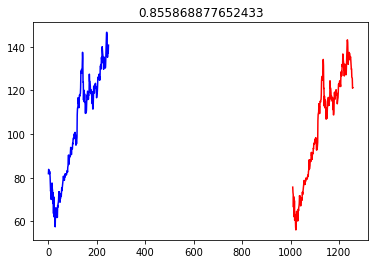

In [174]:
score = modelo.score(X_test, y_test)

predicoes = modelo.predict(X_test)

plt.plot(predicoes, color='blue')
plt.plot(y_test, color='red')
plt.title(score)

In [176]:
predicoes

array([ 81.88684004,  83.82902516,  83.23280533,  83.25328062,
        81.73075305,  82.91294725,  82.06340232,  80.20822547,
        76.40319502,  73.81874018,  74.98814319,  70.09303391,
        70.05209114,  76.56440474,  74.1360447 ,  77.57003666,
        75.05723753,  74.06183544,  68.21227465,  73.11761377,
        70.58177799,  63.62166698,  71.23173179,  62.08123329,
        64.80642255,  63.22248472,  62.73885947,  58.76238555,
        57.51621582,  63.2762226 ,  62.92821685,  66.23426949,
        63.49628511,  65.30540038,  65.17233832,  61.74858011,
        62.77724087,  61.87652334,  67.26549162,  66.48759458,
        68.18668445,  68.67798208,  70.02394737,  73.55517744,
        72.88475615,  73.46306206,  72.46765997,  70.96560768,
        68.77522019,  70.75322535,  70.47942497,  72.5111641 ,
        72.56234452,  71.38781878,  73.72918617,  75.28241106,
        74.07207309,  75.11864779,  76.24454666,  77.03011997,
        77.82592313,  79.46104137,  80.70976856,  79.78

In [177]:
y_test[15:]

1024     61.380001
1025     64.610001
1026     61.935001
1027     63.702499
1028     63.572498
           ...    
1253    126.000000
1254    125.860001
1255    125.349998
1256    120.989998
1257    121.260002
Name: Alvo, Length: 234, dtype: float64